#### Apply necessary ML algorithd for given dataset ('ads.csv'). Evaluate the model using one feature and multiple features. Use feature selection techinque to select one feature
- a. Regression problem: Single and Multiple 
- b. Predict sales: LinearRegression(),Lasso(),Ridge()

 if possible build a streamli application that can predict sales based on TV advertisement.

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Model Selection
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Ignore Warning
import sys
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('ads.csv')

In [3]:
df.sample(5)

,Unnamed: 0,TV,radio,newspaper,sales
175,176,276.9,48.9,41.8,27.0
71,72,109.8,14.3,31.7,12.4
13,14,97.5,7.6,7.2,9.7
86,87,76.3,27.5,16.0,12.0
190,191,39.5,41.1,5.8,10.8


In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

In [7]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [11]:
df.duplicated().any()

False

In [12]:
unique_counts = df.nunique().sort_values()

In [13]:
df.nunique().sort_values()

sales        121
radio        167
newspaper    172
TV           190
dtype: int64

In [14]:
df['TV'].unique()

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 100.4, 216.4, 182.6, 262.7,
       198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3, 102.7,
       131.1,  69. ,  31.5, 139.3, 216.8, 199.1, 109.8,  26.8, 129.4,
       213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4, 239.8,  75.3,
        68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 134.3,  28.6, 217.7,
       250.9, 107.4, 163.3, 197.6, 184.9, 289.7, 135.2, 222.4, 296.4,
       280.2, 187.9, 238.2, 137.9,  25. ,  90.4,  13.1, 255.4, 225.8,
       241.7, 175.7, 209.6,  78.2,  75.1, 139.2, 125.7,  19.4, 141.3,
        18.8, 224. , 123.1, 229.5,  87.2,   7.8,  80.2, 220.3,  59.6,
         0.7, 265.2,

#### Univariate analysis

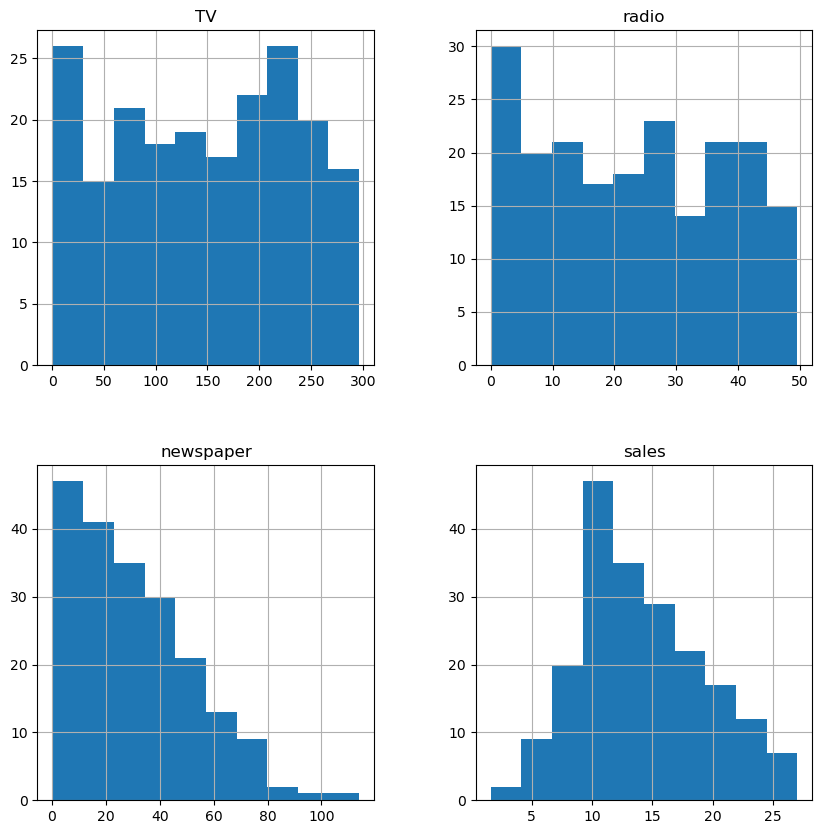

In [15]:
df.hist(bins =10,figsize=(10,10))
plt.show()

In [52]:
df['newspaper'].skew()

0.8947204074986175

## Exploratory Data Analysis

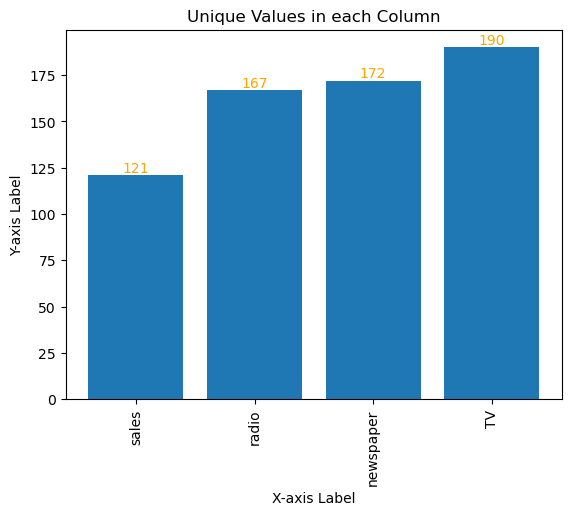

In [18]:
fig, ax = plt.subplots()
ax.bar(unique_counts.index, unique_counts.values)
ax.set_xticks(unique_counts.index)
ax.set_xticklabels(unique_counts.index, rotation=90)

for i, v in enumerate(unique_counts.values):
    ax.text(i, v, str(v), color='orange', ha='center', va='bottom')
    
ax.set_title('Unique Values in each Column')
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')

plt.show()

#### Detection and removal of outliers

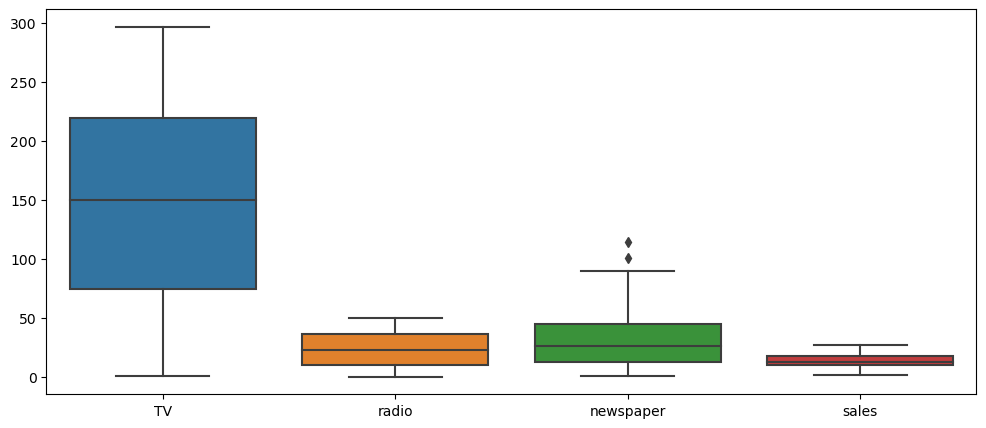

In [19]:
plt.figure(figsize=(12,5))
sns.boxplot(df)
plt.show()

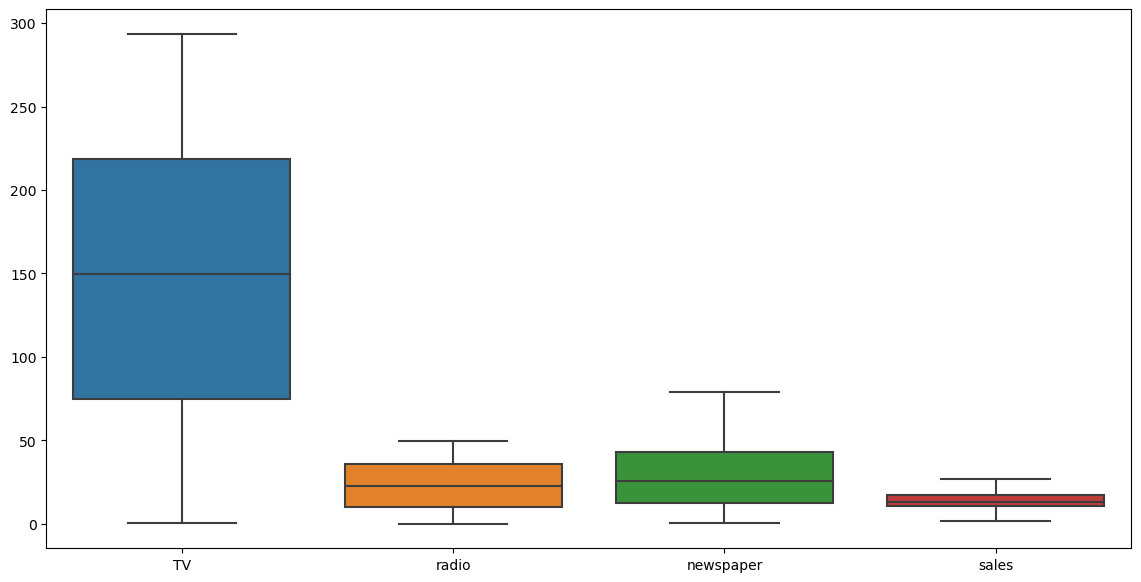

In [20]:
a=df["newspaper"].quantile(0.98)
df_new=df[df['newspaper']<a]

plt.figure(figsize=(14,7))
sns.boxplot(df_new)
plt.show()
# no more outlier is present 

In [21]:
print("No. of rows we lost",df.shape[0]-df_new.shape[0])

No. of rows we lost 4


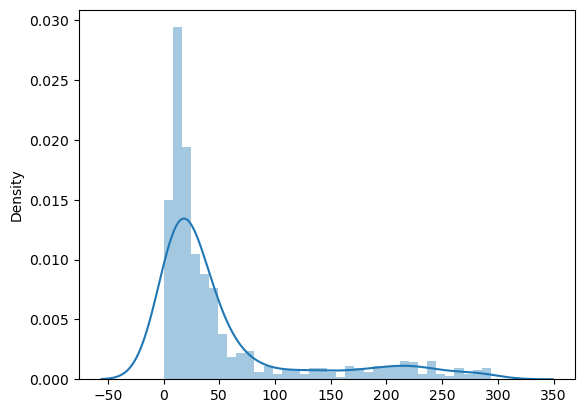

In [22]:
sns.distplot(df_new,kde=True)
plt.show()
# right skewed 

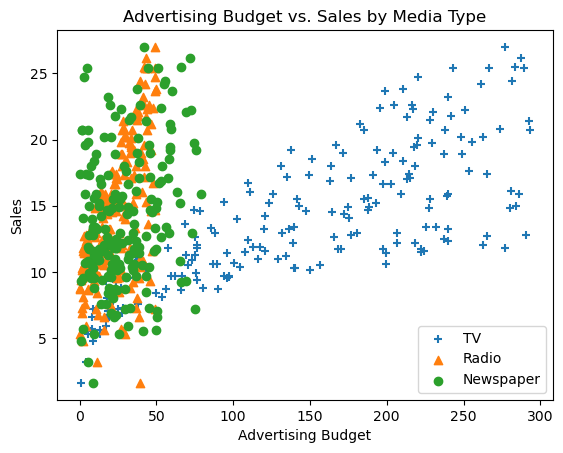

In [23]:
fig, ax = plt.subplots()
ax.scatter(df_new['TV'], df_new['sales'], label='TV', marker='+')
ax.scatter(df_new['radio'], df_new['sales'], label='Radio', marker='^')
ax.scatter(df_new['newspaper'], df_new['sales'], label='Newspaper', marker='o')
ax.set_xlabel('Advertising Budget')
ax.set_ylabel('Sales')
ax.set_title('Advertising Budget vs. Sales by Media Type')
ax.legend()
plt.show()

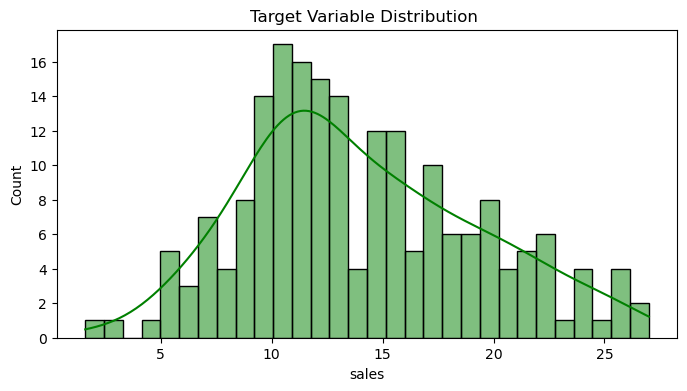

In [24]:
plt.figure(figsize=[8,4])
sns.histplot(df_new.sales, color='g', bins=30, kde=True)
plt.title('Target Variable Distribution ')
plt.show()

#### Multivaraite analysis

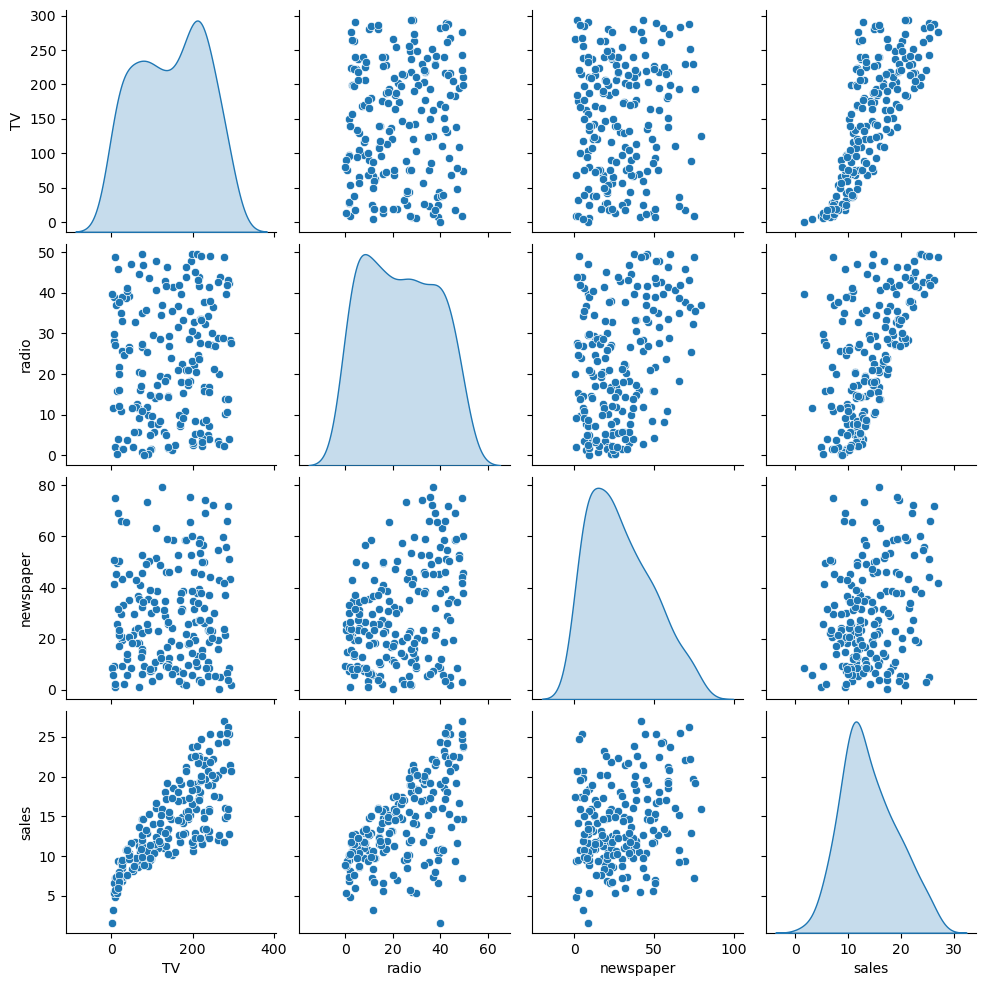

In [25]:
sns.pairplot(df_new,diag_kind='kde')
plt.show()

#### As we have to predict sales based on advertisment budget on TV, Radio & Newspaper, we check correlation between variables and sales column
- High correlation between TV & Sales
- moderate correlation between Radio & Sales
- very low correlation between Newspaper & sales
- data seem to be sort of normally distributed

                 TV     radio  newspaper     sales
TV         1.000000  0.070843   0.061320  0.782440
radio      0.070843  1.000000   0.362191  0.588494
newspaper  0.061320  0.362191   1.000000  0.251373
sales      0.782440  0.588494   0.251373  1.000000


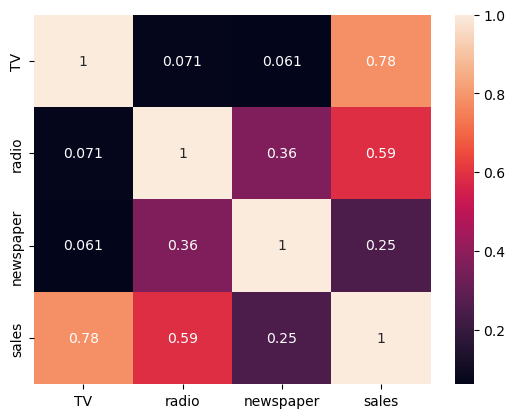

In [27]:
# checking for correlation
print(df_new.corr())
sns.heatmap(df_new.corr(),annot=True)
plt.show()

### Simple Linear regression

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_new[['TV']],df_new[['sales']], test_size = 0.3, random_state=0)

In [29]:
print(X_train)

        TV
152  197.6
184  253.8
55   198.9
162  188.4
17   281.4
..     ...
68   237.4
196   94.2
120  141.3
48   227.2
176  248.4

[137 rows x 1 columns]


In [30]:
X_test.shape

(59, 1)

In [31]:
y_train.shape

(137, 1)

In [32]:
y_test.shape

(59, 1)

In [33]:
# Linear Regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
# Findfing out the coefficient of the linear model
model.coef_

array([[0.04601364]])

In [35]:
# Finding out the interception of the linear model
model.intercept_

array([7.3149757])

In [36]:
0.04581434*265.2 + 7.31081017

19.460773138

###### Observations:
- we have considered linear regression model and have taken sales as our dependent varaible(Response) and TV as our independent variables(predictors).

- the model can also be written as Sales = betao + beta1TV Now we know that betao(intercept of our model) = 7.31081017 and beta1(coefficient of our model) = 0.04581434 So the model can be written as: Sales = 7.31081017 + 0.04581434TV

In [37]:
predicted= model.predict(X_test)
print(predicted)

[[16.20481102]
 [ 8.41010034]
 [11.71848108]
 [13.72007444]
 [20.05615272]
 [19.90890907]
 [16.83059653]
 [11.00526966]
 [ 8.58035081]
 [14.09278492]
 [12.84581527]
 [ 7.71529437]
 [17.45178067]
 [12.70777435]
 [17.54840932]
 [16.74777197]
 [ 7.67388209]
 [19.33833993]
 [15.37196413]
 [11.7414879 ]
 [13.58203352]
 [15.14649729]
 [15.8228978 ]
 [ 8.63096581]
 [13.34736395]
 [ 7.65087527]
 [16.95943472]
 [ 9.61565772]
 [14.93483454]
 [11.44239924]
 [17.81988979]
 [ 7.85333529]
 [13.7246758 ]
 [ 9.2981636 ]
 [15.63424188]
 [10.77980282]
 [ 9.90094229]
 [19.06685945]
 [14.8382059 ]
 [18.36285075]
 [17.4609834 ]
 [18.36285075]
 [ 8.54814126]
 [ 7.71069301]
 [18.32603984]
 [17.42877385]
 [11.32736514]
 [18.27542483]
 [ 8.18003214]
 [12.25684067]
 [ 8.17543077]
 [19.41196175]
 [12.5099157 ]
 [15.39957231]
 [15.45939004]
 [10.6923769 ]
 [15.19711229]
 [17.33214521]
 [17.36435475]]


In [38]:
# checking for one test Observation
0.04581434*265.2 + 7.31081017

19.460773138

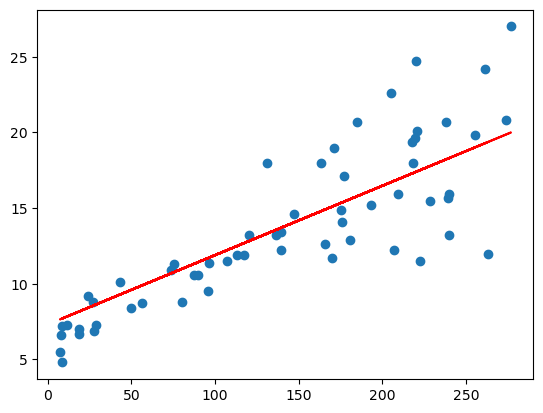

In [39]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 7.31081017 + 0.04581434 * X_test, 'r')
plt.show()

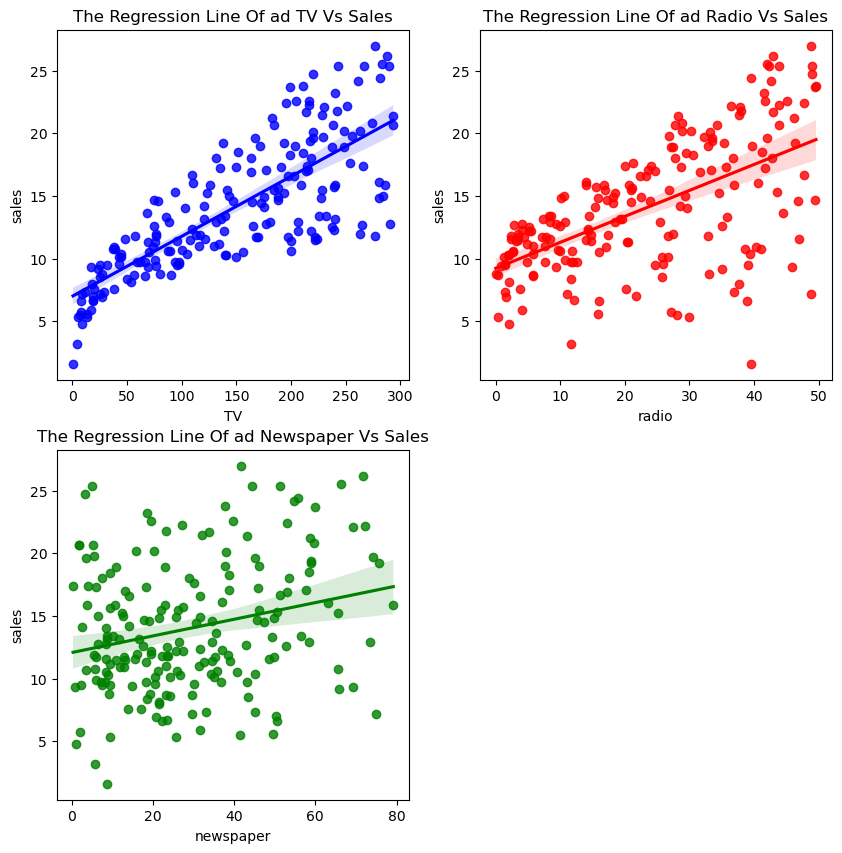

In [40]:
#Plotting the regression line
from matplotlib import figure
plt.figure(figsize =(10,10))
plt.subplot(2,2,1)
sns.regplot(data=df_new,x='TV',y='sales',color='b').set_title('The Regression Line Of ad TV Vs Sales')
plt.subplot(2,2,2)
sns.regplot(data=df_new,x='radio',y='sales',color='r').set_title('The Regression Line Of ad Radio Vs Sales')
plt.subplot(2,2,3)
sns.regplot(data=df_new,x='newspaper',y='sales',color='g').set_title('The Regression Line Of ad Newspaper Vs Sales')
plt.show()

In [41]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred_lr=model.predict(X_test)
# checking mae 
mae=mean_absolute_error(y_test,y_pred_lr)
mse=mean_squared_error(y_test,y_pred_lr)
r2=r2_score(y_test,y_pred_lr)
print("mean absolute error ",round(mae,4))
print("mean square error",round(mse,4))
print("r2 score",round(r2,4))
print("------------------------------")
print("Coefficients of the model: ",model.coef_)
print("Intercept of the model:  ", model.intercept_)

mean absolute error  2.1538
mean square error 8.2176
r2 score 0.6929
------------------------------
Coefficients of the model:  [[0.04601364]]
Intercept of the model:   [7.3149757]


## Multiple Linear Regression

- 1.Multiple linear regression allows us to build a linear relationship between mulitple feartures to estimate a target variable
- 2.Goal - To predict target variable based of features

## Model building¶

In [42]:
X=df_new.drop(['sales'],axis=1)
y=df_new['sales']

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.70,random_state=12345)

## Build different models and check which is best
- using linear regression
- using Lasso
- using Ridge
- using Elasticnet

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
lr=LinearRegression()
linear_model=lr.fit(X,y)
y_pred_lr=linear_model.predict(X_test)
# checking mae 
mae=mean_absolute_error(y_test,y_pred_lr)
mse=mean_squared_error(y_test,y_pred_lr)
r2=r2_score(y_test,y_pred_lr)
print("mean absolute error ",round(mae,4))
print("mean square error",round(mse,4))
print("r2 score",round(r2,4))
print("------------------------------")
print("Coefficients of the model: ", linear_model.coef_)
print("Intercept of the model:  ", linear_model.intercept_)

mean absolute error  1.2493
mean square error 2.8542
r2 score 0.9027
------------------------------
Coefficients of the model:  [0.04549721 0.18680184 0.0035565 ]
Intercept of the model:   2.910810666491411


### Using Lasso L-1 regulation

Lasso is the modification of linear regression it sets irrelavnt values to zero. it might remove too many features in your model.

In [46]:
ls=Lasso()
linear_model=ls.fit(X,y)
y_pred_ls=linear_model.predict(X_test)
# checking mae 
mae=mean_absolute_error(y_test,y_pred_ls)
mse=mean_squared_error(y_test,y_pred_ls)
r2=r2_score(y_test,y_pred_ls)
print("mean absolute erro ",round(mae,4))
print("mean square error",round(mse,4))
print("r2 score",round(r2,4))
print("------------------------------")
print("Coefficients of the model: ", linear_model.coef_)
print("Intercept of the model:  ", linear_model.intercept_)

mean absolute erro  1.2618
mean square error 2.8909
r2 score 0.9015
------------------------------
Coefficients of the model:  [0.04542731 0.182979   0.00202595]
Intercept of the model:   3.054168508850264


# with Ridge
L-2 regulation
enforce the B coefficients to be lower,but not zero.
does not remove irrelvant feature,but minimizes their impact.

In [47]:
rd=Ridge()
linear_model=rd.fit(X,y)
y_pred_rd=linear_model.predict(X_test)
# checking mae 
mae=mean_absolute_error(y_test,y_pred_rd)
mse=mean_squared_error(y_test,y_pred_rd)
r2=r2_score(y_test,y_pred_rd)
print("mean absolute error ",round(mae,4))
print("mean square error",round(mse,4))
print("r2 score",round(r2,4))
print("------------------------------")
print("Coefficients of the model: ", linear_model.coef_)
print("Intercept of the model:  ", linear_model.intercept_)

mean absolute error  1.2493
mean square error 2.8542
r2 score 0.9027
------------------------------
Coefficients of the model:  [0.04549722 0.18679683 0.00355782]
Intercept of the model:   2.9108866402065967


# ElasticNet
it is a hybrid of Lasso and Ridge

In [48]:
En=ElasticNet()
linear_model=En.fit(X,y)
y_pred_En=linear_model.predict(X_test)
# checking mae 
mae=mean_absolute_error(y_test,y_pred_En)
mse=mean_squared_error(y_test,y_pred_En)
r2=r2_score(y_test,y_pred_En)
print("mean absolute error ",round(mae,4))
print("mean square error",round(mse,4))
print("r2 score",round(r2,4))
print("------------------------------")
print("Coefficients of the model: ", linear_model.coef_)
print("Intercept of the model:  ", linear_model.intercept_)

mean absolute error  1.2566
mean square error 2.8741
r2 score 0.9021
------------------------------
Coefficients of the model:  [0.04546323 0.18440552 0.00291909]
Intercept of the model:   2.989827459449579


In [49]:
dict1={"mae":[1.2493,1.2618,1.2493,1.2566],
     "mse":[2.8542,2.8909,2.8542,2.8741],
     "r2_score":[0.9027,0.9015,0.9027,0.9021],
     "coefficients_TV":[0.04549721,0.04542731,0.04549722,0.04546323],
     "coefficents_Radio":[0.182979,0.182979,0.18679683,0.18440552],
     "coefficents_Newspaper":[0.0035565,0.00202595,0.00355782,0.00291909],
     "Intercept":[ 2.9108106664914146,3.0541685088502657, 2.910886640206604,2.989827459449579]}
pd.DataFrame(dict1,index=["Normal linear","Lasso","Ridge","ElasticNet"])

,mae,mse,r2_score,coefficients_TV,coefficents_Radio,coefficents_Newspaper,Intercept
Normal linear,1.2493,2.8542,0.9027,0.045497,0.182979,0.003557,2.910811
Lasso,1.2618,2.8909,0.9015,0.045427,0.182979,0.002026,3.054169
Ridge,1.2493,2.8542,0.9027,0.045497,0.186797,0.003558,2.910887
ElasticNet,1.2566,2.8741,0.9021,0.045463,0.184406,0.002919,2.989827


# Conclusion
- above values are most similar
our dataset has only 200 rows and 4 columns which is very small dataset
while working with good dataset,the above value differ a lot
and based on our need we have to choose our model which is best

In [50]:
import pickle

pickle.dump(df,open('df.pkl', 'wb'))
pickle.dump(lr,open('lr.pkl', 'wb'))


In [51]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
